In [292]:
#Faulty 7 segment display dataset
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

#set seed for reproducibility
np.random.seed(42)

#read dataset from data.txt
df = pd.read_csv('data.txt', sep="\t")
df.rename(columns={'Digit-ID':'label'}, inplace=True)
df

,s1,s2,s3,s4,s5,s6,s7,label
0,0,1,1,0,0,0,0,1
1,1,1,0,1,1,0,1,2
2,1,1,1,1,0,0,1,3
3,0,1,1,0,0,1,1,4
4,1,0,1,1,0,1,1,5
5,0,0,1,1,1,1,1,6
6,1,1,1,0,0,0,0,7
7,1,1,1,1,1,1,1,8
8,1,1,1,0,0,1,1,9
9,1,1,1,1,1,1,0,0


In [293]:
#generate random noisy data
def generate_noisy_data(df, noise_level, copies=20):
    noisyData = pd.DataFrame(columns=df.columns)
    for i in range(df.shape[0]):
      for j in range(copies):
        temp=copy.deepcopy(df.iloc[i])
        temp=pd.DataFrame(temp).T
        # temp["label"]=i
        # print(temp)
        for k in range(7):
          if np.random.uniform()<noise_level:
            temp[temp.columns[k]] = 1-temp[temp.columns[k]]
        noisyData=pd.concat([noisyData, temp], ignore_index=True)
      #shuffle data
      # np.random.shuffle(noisyData)
      # print(noisyData)
    return noisyData

#generate random noisy data
noisyData=generate_noisy_data(df, 0)
# print(df)
noisyData = noisyData.sample(frac=1, random_state=42).reset_index(drop=True)
noisyData

,s1,s2,s3,s4,s5,s6,s7,label
0,1,0,1,1,0,1,1,5
1,0,1,1,0,0,0,0,1
2,1,1,0,1,1,0,1,2
3,1,1,1,1,1,1,1,8
4,1,1,1,0,0,0,0,7
...,...,...,...,...,...,...,...,...
195,0,0,1,1,1,1,1,6
196,0,1,1,0,0,0,0,1
197,1,0,1,1,0,1,1,5
198,1,1,1,0,0,1,1,9


In [294]:
# Naive Bayes Classifier
# train test split
from sklearn.model_selection import train_test_split
X=noisyData.iloc[:, :-1].astype('int')
y=noisyData.iloc[:, -1].astype('int')
# X= df.iloc[:, :-1].astype('int')
# y= df.iloc[:, -1].astype('int')
# print(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fitting the model
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
# classifier.fit(X, y)

#predicting the test set results
y_pred = classifier.predict(X_test)
# y_pred = classifier.predict(noisyData.iloc[:, :-1].astype('int'))

#Accuracy
from sklearn.metrics import accuracy_score
# print("Accuracy: ", accuracy_score(y_test , y_pred))
print("Accuracy: ", np.sum(y_pred==y_test)/y_test.shape[0])

Accuracy:  1.0


[[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 6. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 7. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]


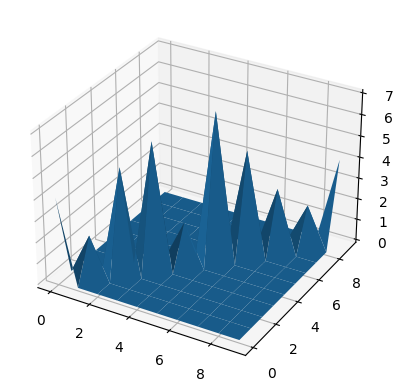

Accuracy:  1.0


In [295]:
# Naive Bayes Classifier without sklearn
def NaiveBayes(train_X, test_X, train_y, test_y):
    #train
    #calculate prior probability
    prior = np.zeros(10)
    for i in range(10):
        prior[i] = np.sum(train_y==i)/train_y.shape[0]
    # print(prior)
    
    #calculate conditional probability
    cond_prob = np.zeros((10, 7, 2))
    for i in range(10):
        for j in range(7):
            for k in range(2):
                cond_prob[i, j, k] = np.sum(train_X[train_y==i].iloc[:, j]==k)/np.sum(train_y==i)
    # print(cond_prob)
    #predict
    y_pred = np.zeros(test_y.shape[0])
    for i in range(test_y.shape[0]):
        prob = np.zeros(10)
        for j in range(10):
            prob[j] = prior[j]
            for k in range(7):
                prob[j] *= cond_prob[j, k, test_X.iloc[i, k]]
        y_pred[i] = np.argmax(prob)
    # count and scatter plot of predicted and actual values
    count=np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            count[i, j] = np.sum((y_pred==i)&(test_y==j))
    print(count)
    #3D plot of predicted, actual and count
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(10)
    y = np.arange(10)
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, count)
    plt.show()
    #accuracy
    print("Accuracy: ", np.sum(y_pred==test_y)/test_y.shape[0])

NaiveBayes(X_train, X_test, y_train, y_test)